In [1]:
from IPython.display import clear_output, Image, display, HTML
import time

import numpy as np
import cv2

import matplotlib.pyplot as plt
import numpy as np

cap = cv2.VideoCapture("../../../examples/media/baconfireRB.mp4")
ret, temp = cap.read()

In [2]:
def arrayShow(img):
    _,ret = cv2.imencode('.jpg', img) 
    return Image(data=ret) 

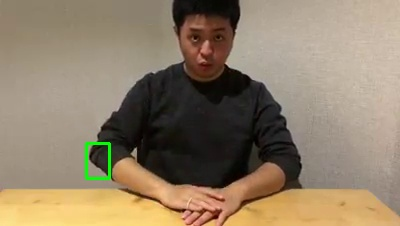

The END


In [3]:
while(1):
    try:
        t0 = temp
        ret, t1 = cap.read()
        if not ret:
            break
        clear_output(wait=True)
        temp = t1

        grey1 = cv2.cvtColor(t0, cv2.COLOR_BGR2GRAY)
        grey2 = cv2.cvtColor(t1, cv2.COLOR_BGR2GRAY)
        blur1 = cv2.GaussianBlur(grey1,(7,7),0)
        blur2 = cv2.GaussianBlur(grey2,(5,5),0)

        d = cv2.absdiff(blur1, blur2)
        ret, th = cv2.threshold( d, 10, 255, cv2.THRESH_BINARY )
        dilated=cv2.dilate(th, None, iterations=1)
        contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        areas = [cv2.contourArea(c) for c in contours]
        max_index = np.argmax(areas)
        cnt=contours[max_index]
        x,y,w,h = cv2.boundingRect(cnt) 
        markColor = (0,255,0)
#         cv2.drawContours(t0, cnt, -1, markColor, 2)
        cv2.rectangle(t0,(x,y),(x+w,y+h), markColor,2)

        img = arrayShow(t0)
        display(img)
        time.sleep(0.13)
#         plt.imshow(t0)
#         plt.show()
    except:
        print("exception")
        video.release()
print("The END")